In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! ls ../data/

item_categories.csv   items.csv             sales_train.csv       sample_submission.csv shops.csv             test.csv


In [3]:
PATH_TO_DATA = '../data/'

In [4]:
item_categories = pd.read_csv(os.path.join(PATH_TO_DATA, 'item_categories.csv'))

In [5]:
item_categories.head(10)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [6]:
items = pd.read_csv(os.path.join(PATH_TO_DATA, 'items.csv'))

In [7]:
items.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [8]:
shops = pd.read_csv(os.path.join(PATH_TO_DATA, 'shops.csv'))

In [9]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [10]:
sales_train = pd.read_csv(os.path.join(PATH_TO_DATA, 'sales_train.csv'))

In [11]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [13]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [14]:
test = pd.read_csv(os.path.join(PATH_TO_DATA, 'test.csv'))

In [15]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


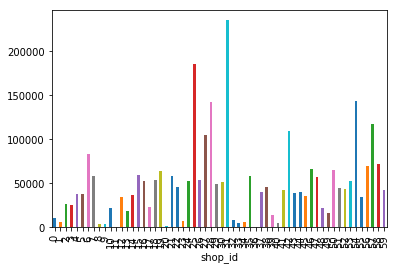

In [14]:
sales_train.groupby('shop_id')['date'].count().plot.bar()

In [15]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [18]:
sales_train['date_block_num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [16]:
sales_train['date_block_num'].max()

33

In [17]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [24]:
sales_month_grouped_train = sales_train.groupby(['date_block_num', 'shop_id', 'item_id'])['item_cnt_day'].sum().reset_index()

In [29]:
sales_month_grouped_train_last_month = sales_month_grouped_train[sales_month_grouped_train['date_block_num'] == 33]

In [30]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [31]:
sales_month_grouped_train_last_month.head()

,date_block_num,shop_id,item_id,item_cnt_day
1577593,33,2,31,1.0
1577594,33,2,486,3.0
1577595,33,2,787,1.0
1577596,33,2,794,1.0
1577597,33,2,968,1.0


In [54]:
test_with_benchmark = pd.merge(
    test,
    sales_month_grouped_train_last_month,
    on=['shop_id', 'item_id'],
    how='left'
)[['ID', 'item_cnt_day']]
test_with_benchmark.columns = ['ID', 'item_cnt_month']

In [55]:
test_with_benchmark.fillna(0.0, inplace=True)

In [56]:
test_with_benchmark.loc[test_with_benchmark['item_cnt_month'] > 20, 'item_cnt_month'] = 20
test_with_benchmark.loc[test_with_benchmark['item_cnt_month'] < 0, 'item_cnt_month'] = 0

In [57]:
test_with_benchmark.describe()

,ID,item_cnt_month
count,214200.000000,214200.000000
mean,107099.500000,0.255649
std,61834.358168,1.089856
min,0.000000,0.000000
25%,53549.750000,0.000000
50%,107099.500000,0.000000
75%,160649.250000,0.000000
max,214199.000000,20.000000


In [58]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [60]:
sales_train.groupby('date_block_num')['item_cnt_day'].count()

date_block_num
0     115690
1     108613
2     121347
3      94109
4      91759
5     100403
6     100548
7     104772
8      96137
9      94202
10     96736
11    143246
12     99349
13     89830
14     92733
15     77906
16     78529
17     82408
18     78760
19     86614
20     73157
21     79361
22     86428
23    130786
24     88522
25     71808
26     69977
27     56274
28     54548
29     54617
30     55549
31     57029
32     50588
33     53514
Name: item_cnt_day, dtype: int64

In [61]:
sales_month_grouped_train = sales_train.groupby(['date_block_num', 'shop_id', 'item_id'])['item_cnt_day'].sum().reset_index()

In [ ]:
sales_month_grouped_train['previous_month'] = sales_month_grouped_train['date_block_num'] - 1

In [64]:
sales_month_grouped_train.head()

,date_block_num,shop_id,item_id,item_cnt_day,previous_month
0,0,0,32,6.0,-1
1,0,0,33,3.0,-1
2,0,0,35,1.0,-1
3,0,0,43,1.0,-1
4,0,0,51,2.0,-1


In [ ]:
df_tmp = pd.merge(
    sales_month_grouped_train,
    sales_month_grouped_train,
    left_on='date_block_num',
    right_on='previous_month',
    how='left'
)

In [ ]:
df_tmp.head()